In [1]:
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("HousingData.csv")

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
m = df.median()
m

CRIM         0.253715
ZN           0.000000
INDUS        9.690000
CHAS         0.000000
NOX          0.538000
RM           6.208500
AGE         76.800000
DIS          3.207450
RAD          5.000000
TAX        330.000000
PTRATIO     19.050000
B          391.440000
LSTAT       11.430000
MEDV        21.200000
dtype: float64

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
to_impute = ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']

In [12]:
to_impute

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [13]:
mean_imputer = SimpleImputer(strategy='mean')

df[to_impute] =  mean_imputer.fit_transform(df[to_impute])

In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
df1 = df.copy(deep=True)

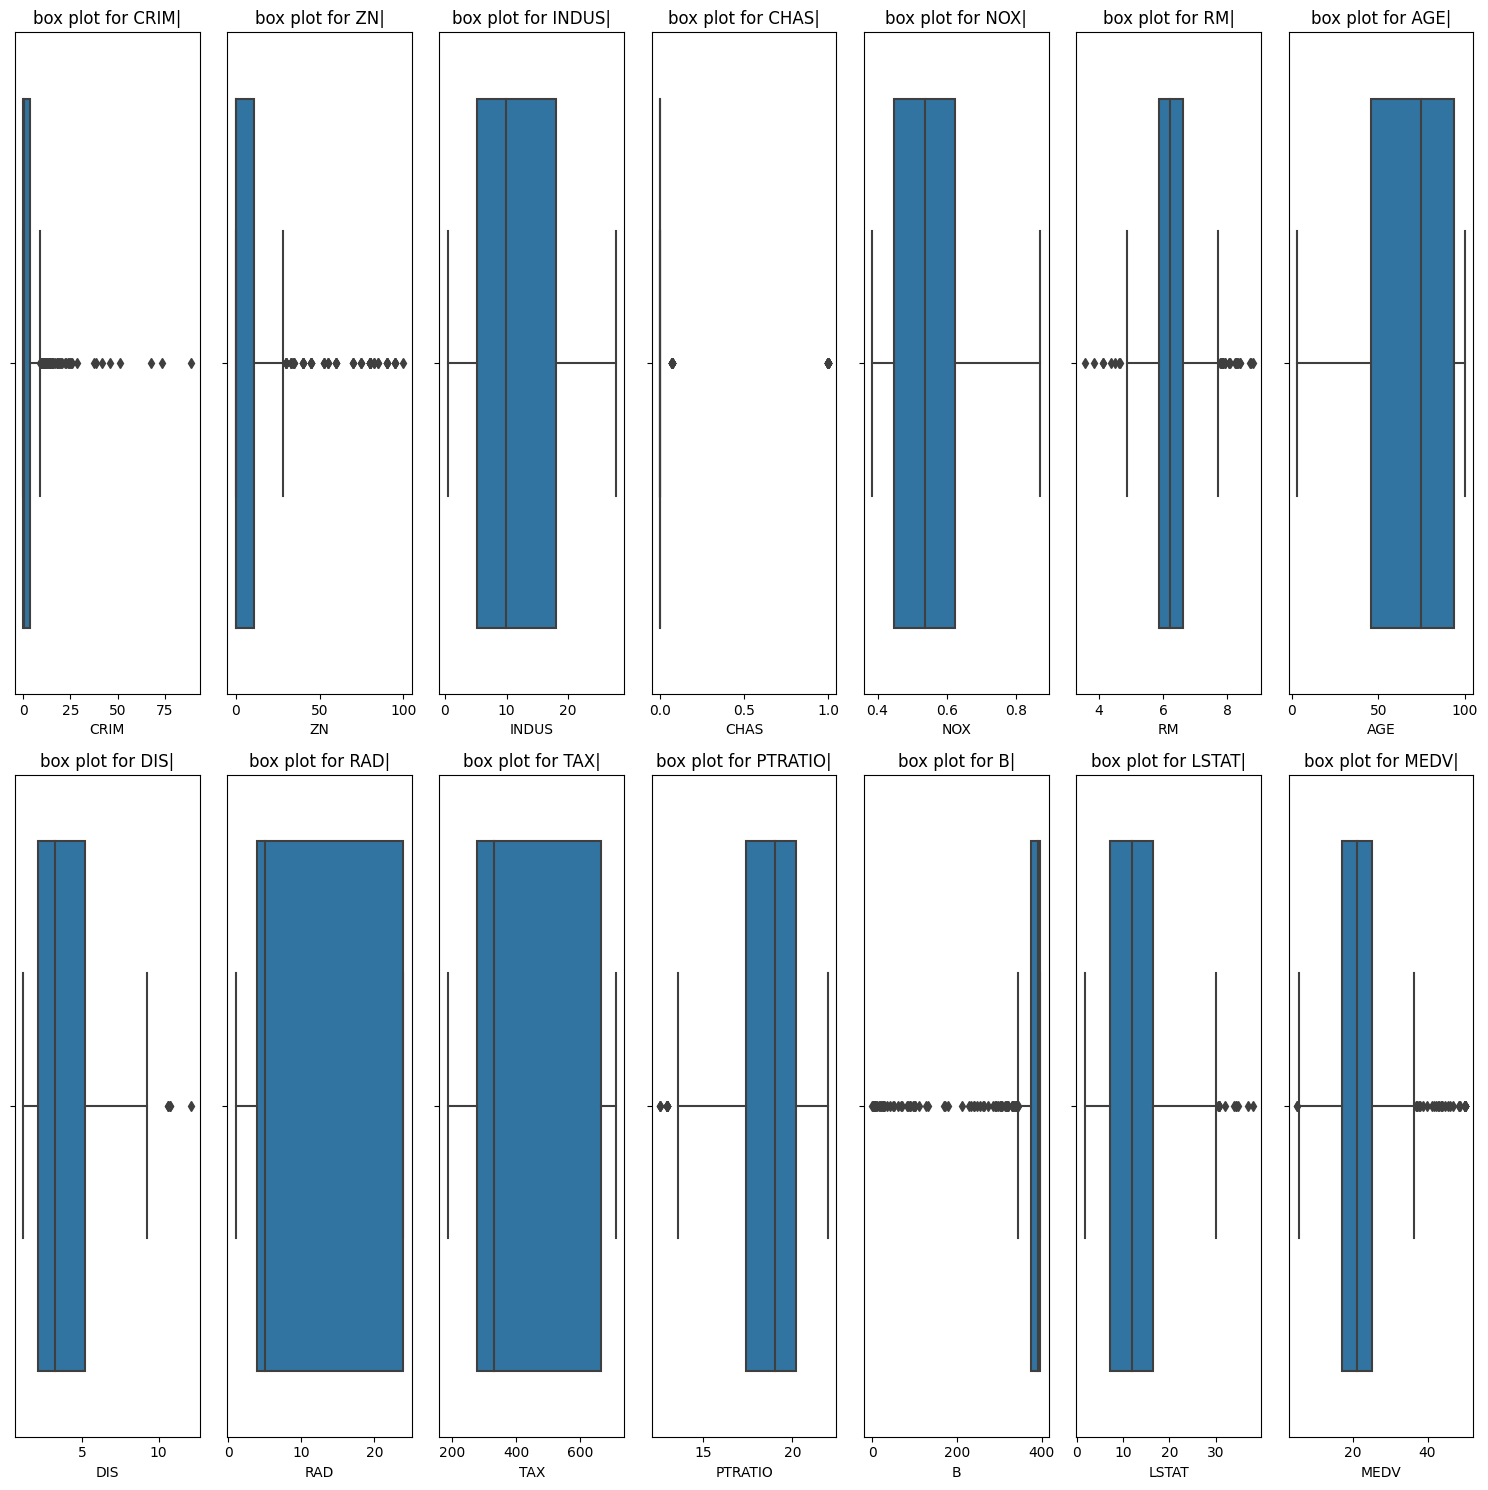

In [16]:
plt.figure(figsize=(15,15))
number_columns = len(df.columns)

for i,col in enumerate(df.columns):
    plt.subplot(2,number_columns//2,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'box plot for {col}|')

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats.mstats import winsorize

In [18]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[~(((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))))]
   return outliers

In [19]:
to_win = ['CRIM','ZN','CHAS','RM','DIS','PTRATIO','B','LSTAT','MEDV'] 


for i in to_win:
    df[i] = winsorize(df[i],(0.1,0.1))

In [20]:
df = find_outliers_IQR(df)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [21]:
df.isnull().sum()

CRIM       64
ZN         68
INDUS       0
CHAS       54
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B          77
LSTAT       0
MEDV        0
dtype: int64

In [22]:
mean = df.mean()
df.fillna(mean,inplace=True)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

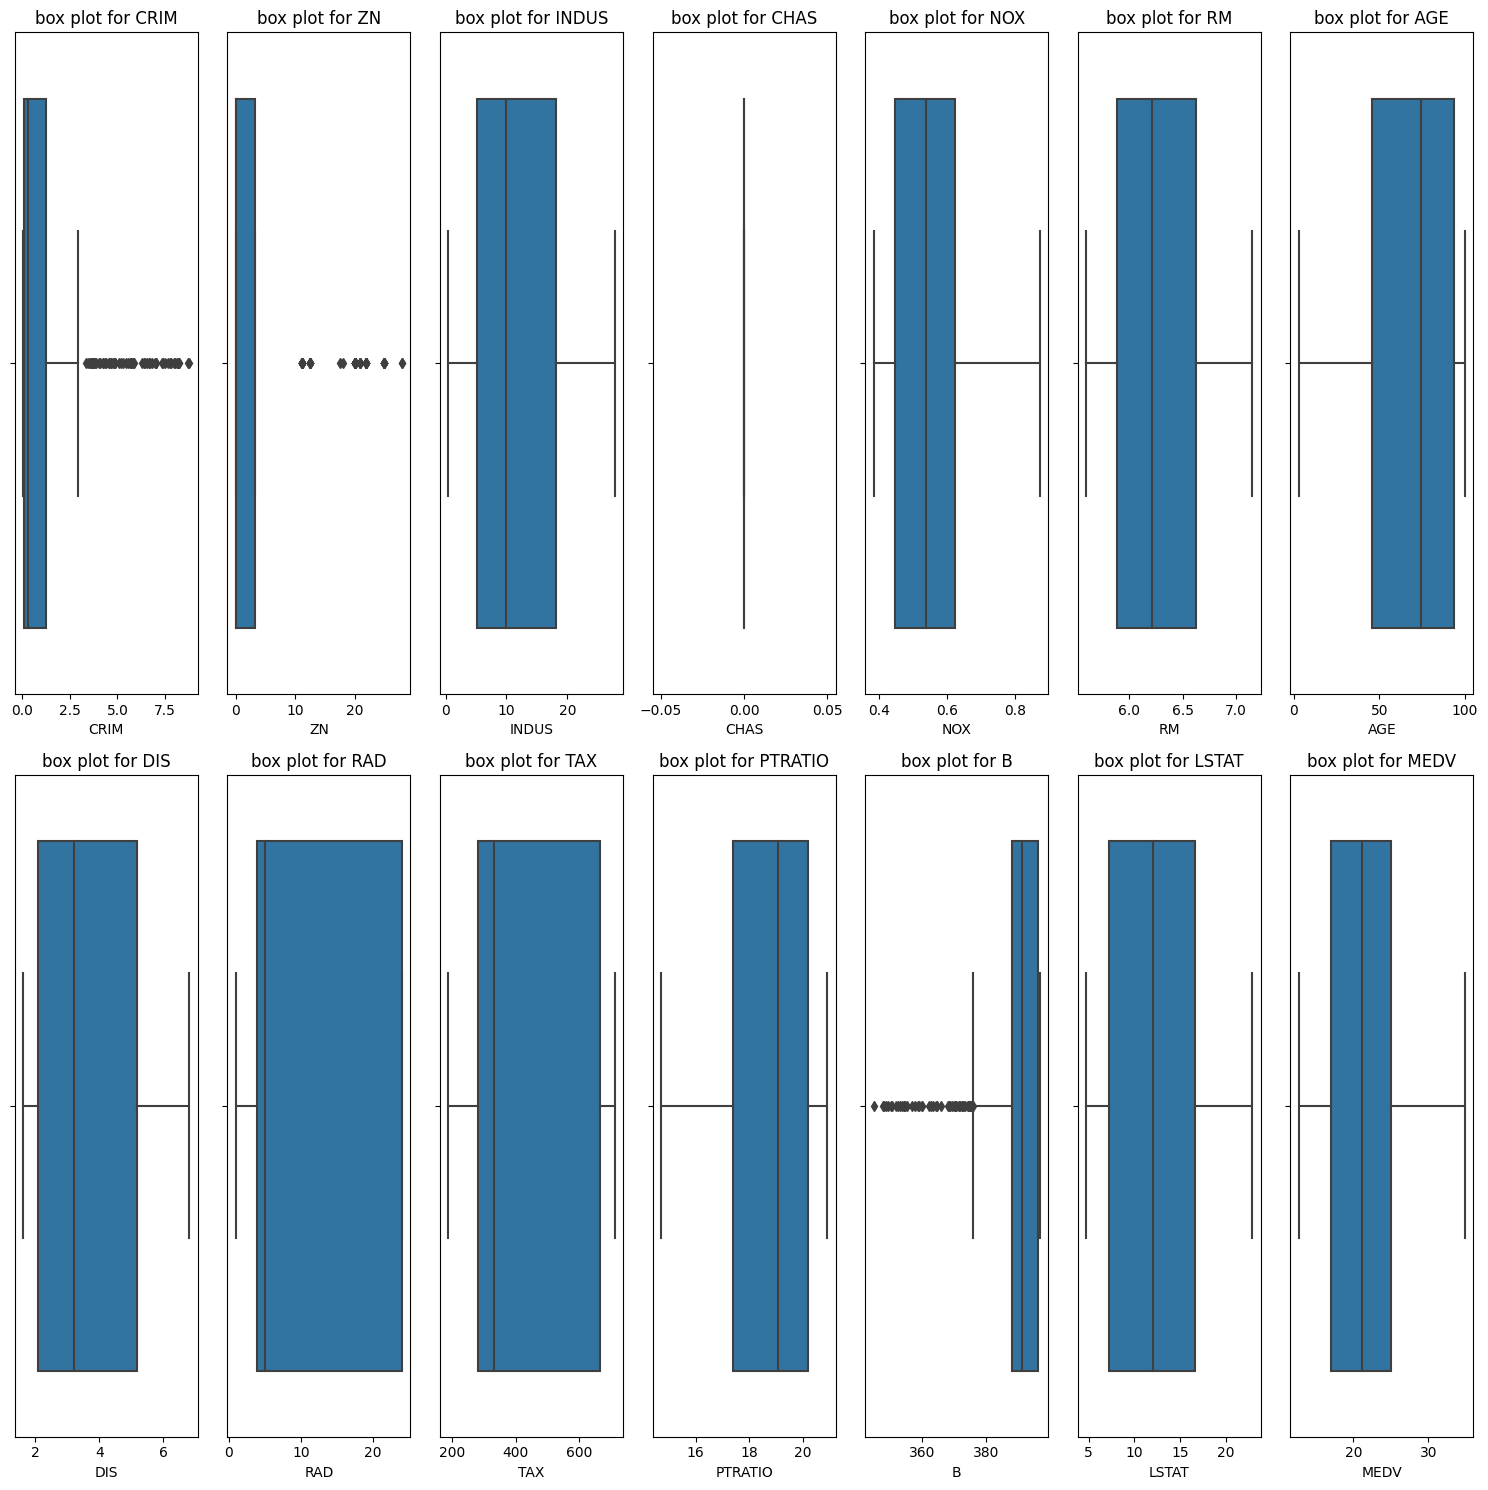

In [23]:
plt.figure(figsize=(15,15))
number_columns = len(df.columns)

for i,col in enumerate(df.columns):
    plt.subplot(2,number_columns//2,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'box plot for {col}')

plt.tight_layout()
plt.show()

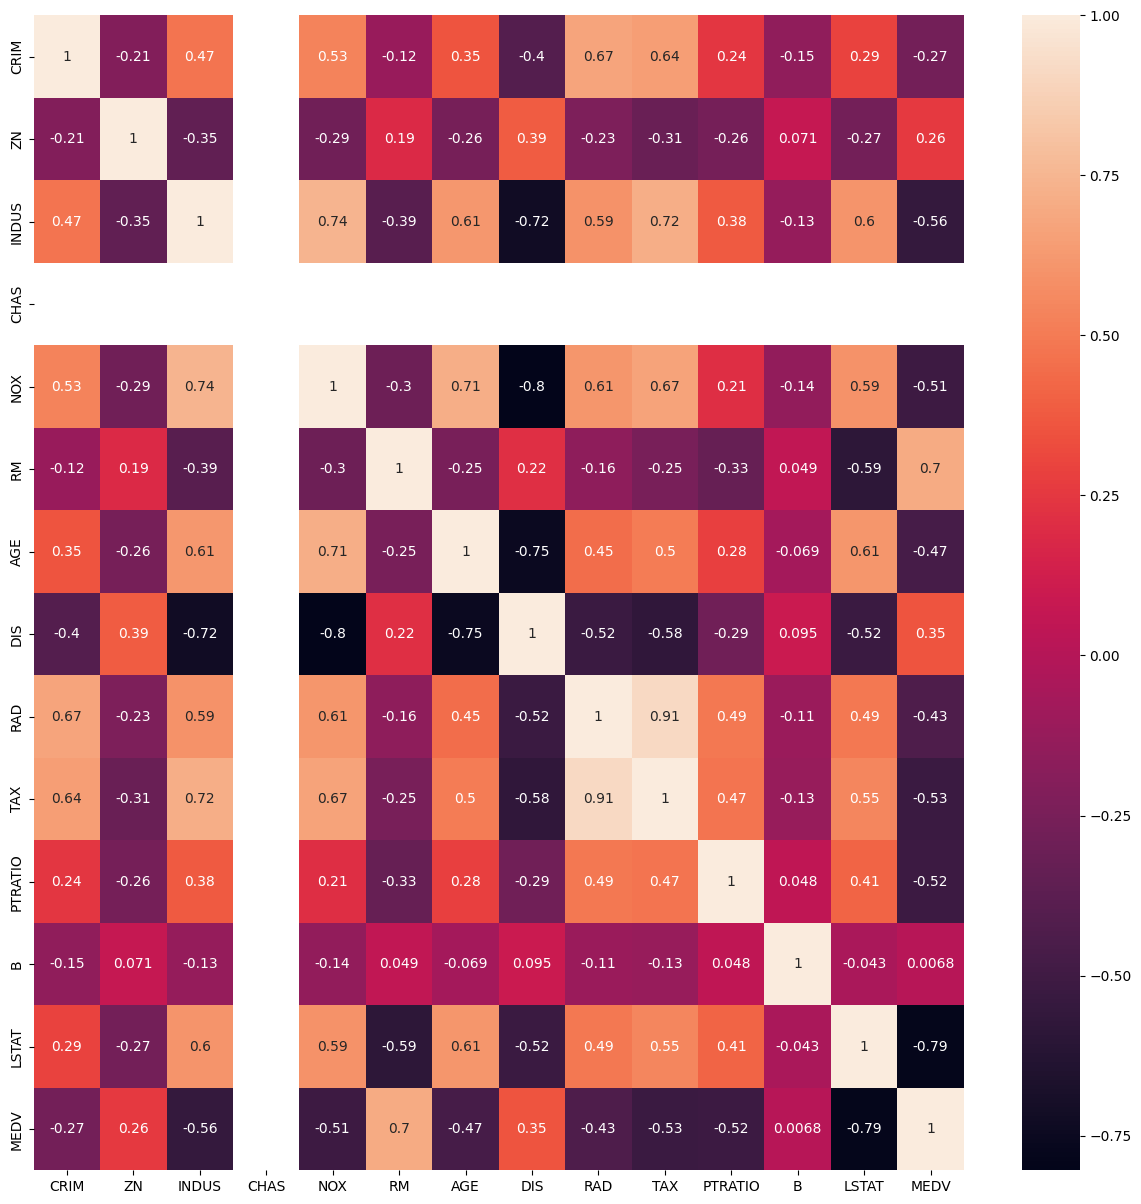

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
##Droping features wtih negligible corelation and high amout of outliers 
X = df.drop(columns=['CHAS','B','MEDV','ZN','CRIM'],axis=1)
# Chosing Dependent Variable or prediction value
y =  df['MEDV']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
Lr = LinearRegression()

In [30]:
Lr.fit(X_train,y_train)

LinearRegression()

In [31]:
pred_LR = Lr.predict(X_test)

In [32]:
pred_LR

array([28.03070931, 28.53295794, 27.28702991, 12.14585692, 30.05772417,
       12.17576032, 27.33854364, 28.67042447, 25.69553381, 20.08367374,
       31.54954612, 21.92563844, 22.96307019, 31.66159986, 27.49600132,
       17.91267452, 13.15107894, 17.80707678, 14.30081309, 20.62496436,
        8.14686887, 19.11718525, 32.88225293, 23.97645003, 29.44078685,
       11.85363298, 25.12869432, 22.35878356, 23.4184769 , 25.36435433,
       16.29175784,  8.2268495 , 16.32738434, 20.36036174, 27.7262139 ,
       18.40498262, 26.67208368, 12.88542569, 32.90887926, 30.72619239,
       18.17131747, 10.66817865, 28.69582186, 14.07699785, 26.61701147,
       29.46023932, 11.74714227, 18.04944322, 20.03667425, 13.03915834,
       20.35134165, 19.91702595, 23.87059121, 14.90977557, 16.94033551,
       25.93143245, 32.8406235 , 16.88156954, 28.11080695, 20.60018321,
       19.8737803 , 25.68873661, 13.97071775, 31.0933254 , 17.79447704,
       13.43557434, 19.65058929, 25.79561386, 22.50231979, 19.65

In [33]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [34]:
print("R squared Error",metrics.r2_score(y_test,pred_LR))
print("Mean squared score",mean_squared_error(y_test,pred_LR))

R squared Error 0.7962439548874011
Mean squared score 8.882155296395602


In [35]:
from sklearn.svm import SVR

In [36]:
#Follwing values of the parameters were obtained by using GridSerachCV with r2 as scoring parameter
#TO NOTE: Sklearn uses SMO( Sequential Minimal Optimization ) algorithm to solve weights and biases 
svr = SVR(kernel='linear',C=1.4,gamma=0.1)
svr.fit(X_train,y_train)

SVR(C=1.4, gamma=0.1, kernel='linear')

In [37]:
pred_SVR = svr.predict(X_test)

In [38]:
print("R squared Error",metrics.r2_score(y_test,pred_SVR))
print("Mean squared score",mean_squared_error(y_test,pred_SVR))

R squared Error 0.7862432427537183
Mean squared score 9.3181074086229


In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

In [40]:
param = {
        'C' : [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
        'kernel' : ['linear','rbf'],
        'gamma' : [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

grid_svr = GridSearchCV(svr,param_grid=param,scoring=['r2','neg_mean_absolute_error'],refit='r2',cv=10,verbose=4)

In [41]:
#grid_svr.fit(X_train,y_train)

In [42]:
#grid_svr.best_score_

In [43]:
#grid_svr.best_params_

## Comparing both models prediction by the perfect regression line

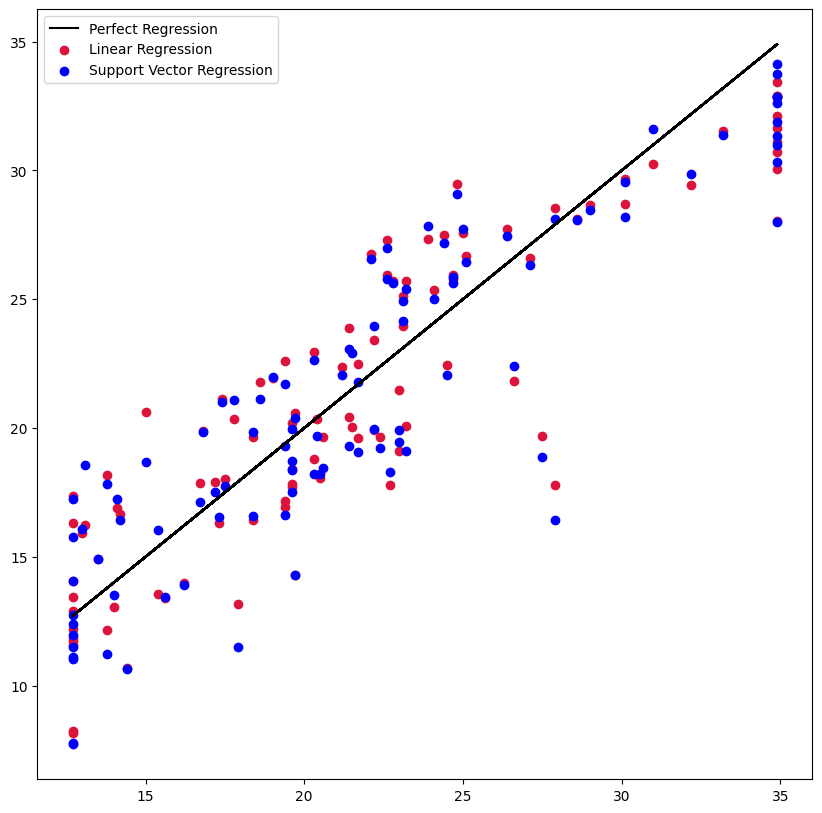

In [44]:
plt.figure(figsize=(10,10))
plt.plot(y_test,y_test,color='black',label="perfect") ## Perfect Regression Line
plt.scatter(y_test,pred_LR,c='crimson') ## Linear Regression Predictions
plt.scatter(y_test,pred_SVR,c='blue') ## SVR Predictions
plt.legend(["Perfect Regression","Linear Regression","Support Vector Regression"])
plt.show()


In [45]:
## Initializing tne Root Mean Squared Error formula
def RMSE(predictions,true_value):
    return np.sqrt(np.mean((predictions-true_value)**2))

In [46]:
RMSE_Lr = RMSE(pred_LR,y_test)
RMSE_Lr

2.98029449826617

In [47]:
RMSE_SVR = RMSE(pred_SVR,y_test)
RMSE_SVR

3.052557519298023

In [48]:
from sklearn.metrics import mean_absolute_error as mae

In [49]:
MAE_LR = mae(y_test,pred_LR)
MAE_SVR = mae(y_test,pred_SVR)

In [50]:
print(MAE_LR)
print(MAE_SVR)

2.4440266197381355
2.4319559667233204


## Comparing Linear Regression and Support Vector Regression with one dependent and one independent variable and wihtout any outlier treatment in the dataset

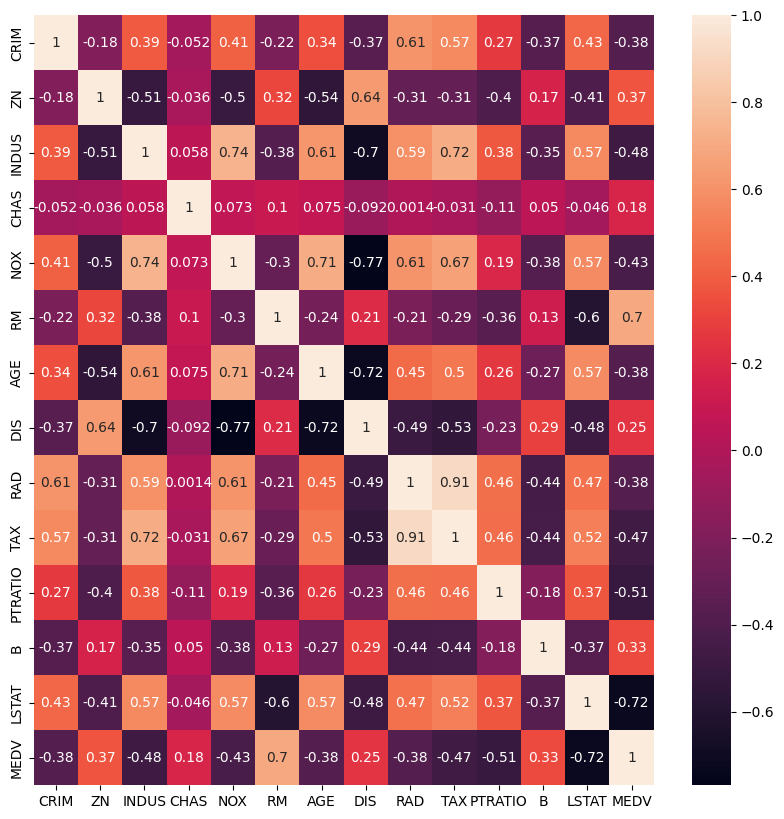

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [52]:
## Still for Best performance we will choose the independent variable LSTAT as out one and only X-variable as it has the most 
## correlation with our 
##dependent variable MEDV

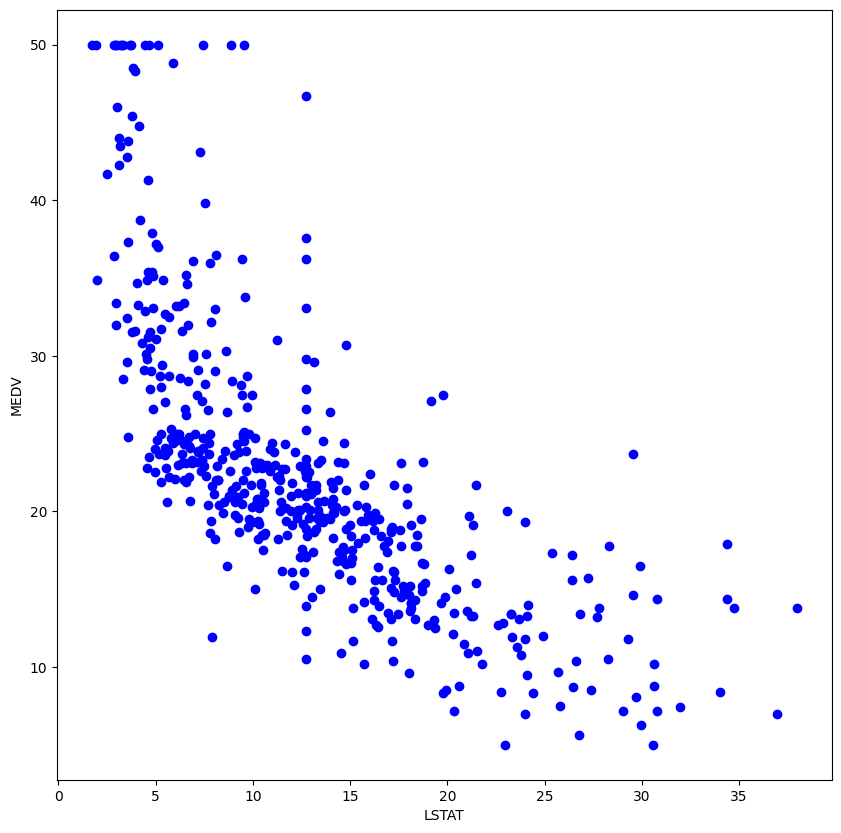

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(df1['LSTAT'],df1['MEDV'],c='blue')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [54]:
# we can see clear -ve correlation bw LSTAT and MEDV

In [55]:
x1 = df1["LSTAT"]
y1 = df1["MEDV"]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state = 5)

In [56]:
print(y1_train.shape,y1_test.shape)
print(x1_train.shape,x1_test.shape)
# as we can clearly see the x and y for both testing and training are 1-d vectors

(404,) (102,)
(404,) (102,)


In [57]:
lr1 = LinearRegression()
x1_train = x1_train.values.reshape((-1,1))
y1_train = y1_train.values.reshape((-1,1))
lr1.fit(x1_train,y1_train)

LinearRegression()

In [58]:
y1_test = y1_test.values.reshape((-1,1))
x1_test = x1_test.values.reshape((-1,1))
LR_PRED = lr1.predict(x1_test)

In [91]:
print("R squared score",metrics.r2_score(y1_test,LR_PRED))
print("Mean squared errro",mean_squared_error(y1_test,LR_PRED))

R squared score 0.47812855307903857
Mean squared errro 40.859334545776036


In [60]:
SVR1 = SVR()
SVR1.fit(x1_train,y1_train)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [61]:
SVR_PRED = SVR1.predict(x1_test)

In [62]:
print("R squared Error",metrics.r2_score(y1_test,SVR_PRED))
print("Mean squared score",mean_squared_error(y1_test,SVR_PRED))

R squared Error 0.5529597152095893
Mean squared score 35.00051336293319


In [63]:
## Plotting the comparison graph for both models with the perfect regression

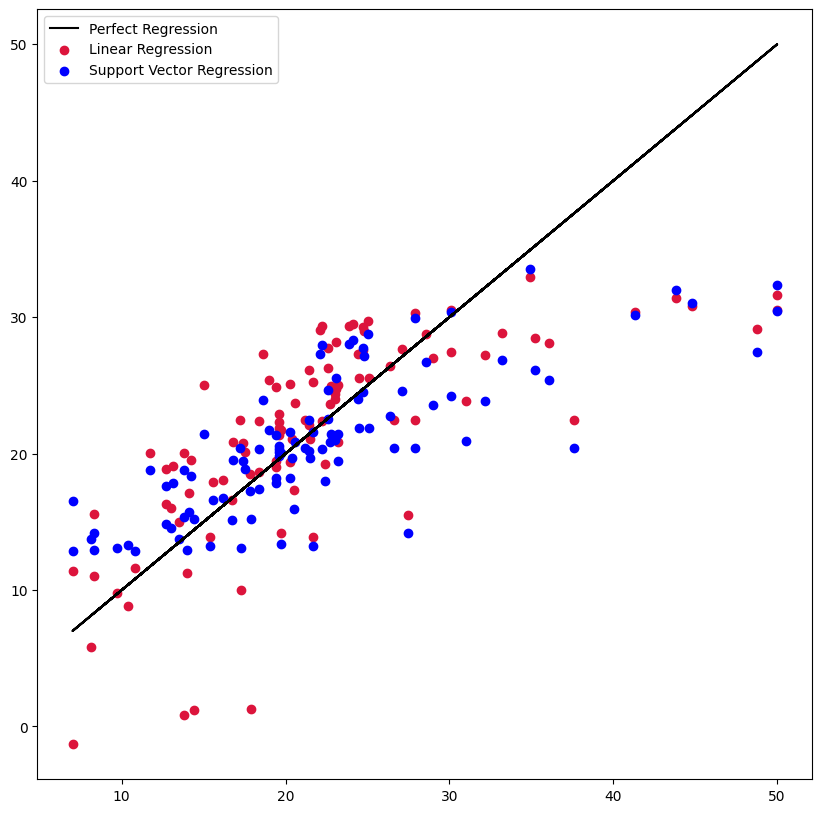

In [64]:
plt.figure(figsize=(10,10))
plt.plot(y1_test,y1_test,color='black',label="perfect") ## Perfect Regression Line
plt.scatter(y1_test,LR_PRED,c='crimson') ## Linear Regression Predictions
plt.scatter(y1_test,SVR_PRED,c='blue') ## SVR Predictions
plt.legend(["Perfect Regression","Linear Regression","Support Vector Regression"])
plt.show()

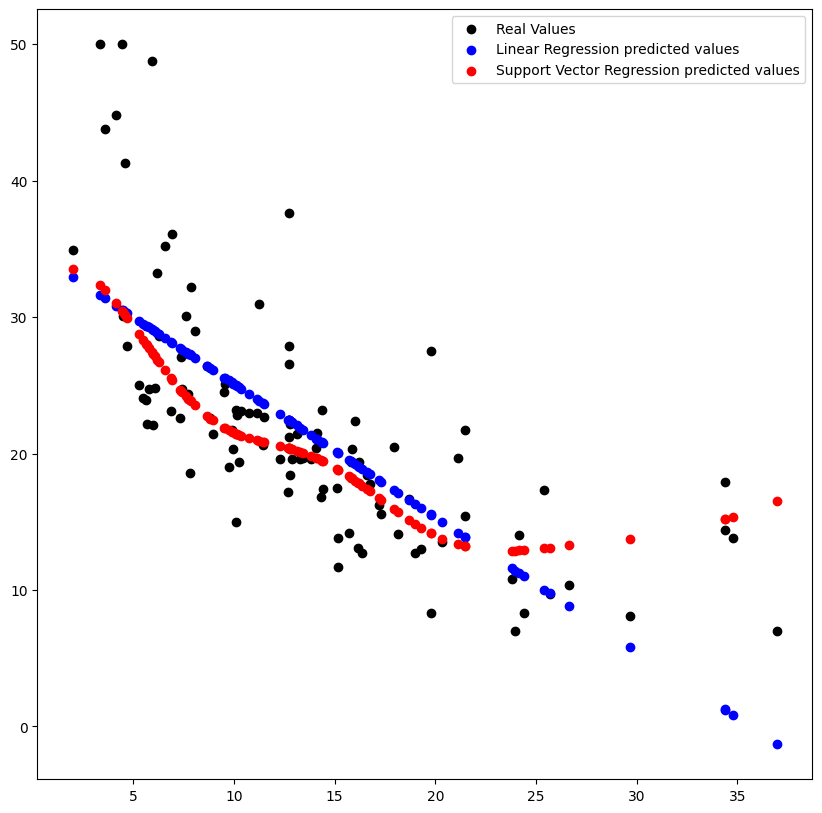

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(x1_test,y1_test,c='black')
plt.scatter(x1_test,LR_PRED,c='blue')
plt.scatter(x1_test,SVR_PRED,c='red')
plt.legend(["Real Values","Linear Regression predicted values","Support Vector Regression predicted values"])
plt.show()

## From the above two graphs we can clearly see that the predictions for both Linear Regression and Support Vector Regression as not substantial
## also seeing to the error values we can also say that with less(in this case 1) features and low treatment of data SVR did better that LR 

# comparison with  one feature but data treated for outliers

In [66]:
RMSE_LR1 = RMSE(y1_test,LR_PRED)
print(RMSE_LR1)
RMSE_SVR1 = RMSE(y1_test,SVR_PRED)
print(RMSE_SVR1)

6.392130673396472
10.32391846812325


In [89]:
MAE_LR1 = mae(y1_test,LR_PRED)
MAE_SVR1 = mae(y1_test,SVR_PRED)
print(MAE_LR1)
print(MAE_SVR1)

4.668250473323204
4.099097508624124


In [67]:
x2 = df1['LSTAT']
x2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: LSTAT
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


<Axes: xlabel='LSTAT'>

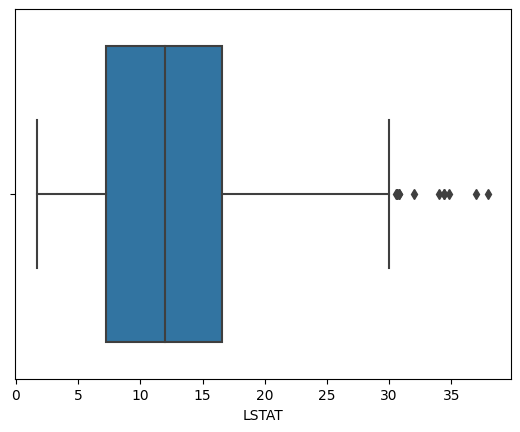

In [68]:
sns.boxplot(x=x2)

In [69]:
# data is treated for outliers METHOD USED - WINSORIZATION

In [70]:
x2 = winsorize(x2,(0.1,0.1))

<Axes: >

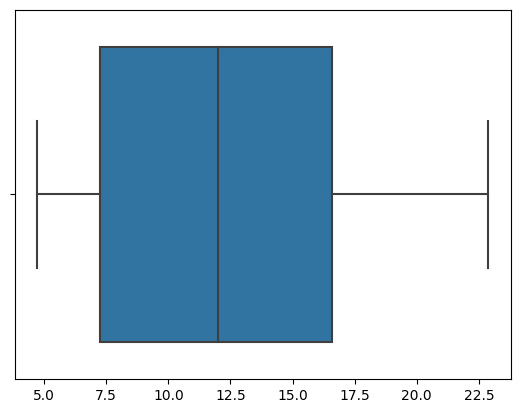

In [71]:
sns.boxplot(x=x2)

In [72]:
x2.shape

(506,)

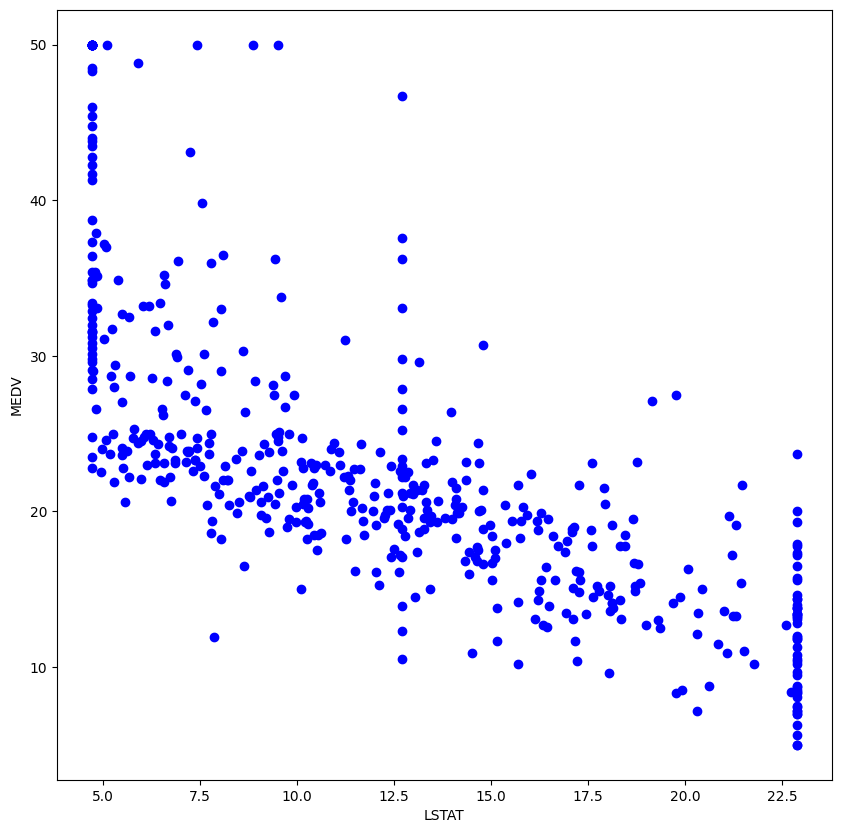

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(x2,df1['MEDV'],c="blue")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [74]:

y2 = df1['MEDV']
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=5)
x2_train = x2_train.reshape((-1,1))
x2_test = x2_test.reshape((-1,1))

In [75]:
lr2 = LinearRegression()
lr2.fit(x2_train,y2_train)

LinearRegression()

In [76]:
LR2_PRED = lr2.predict(x2_test)

In [77]:
print("R squared Error",metrics.r2_score(y2_test,LR2_PRED))
print("Mean squared score",mean_squared_error(y2_test,LR2_PRED))

R squared Error 0.5473171291038574
Mean squared score 35.44229325864831


In [78]:
svr2 = SVR()

In [79]:
svr2.fit(x2_train,y2_train)

SVR()

In [80]:
SVR2_PRED = svr2.predict(x2_test)

In [81]:
print("R squared Error",metrics.r2_score(y2_test,SVR2_PRED))
print("Mean squared score",mean_squared_error(y2_test,SVR2_PRED))

R squared Error 0.5446835034103816
Mean squared score 35.648490002909696


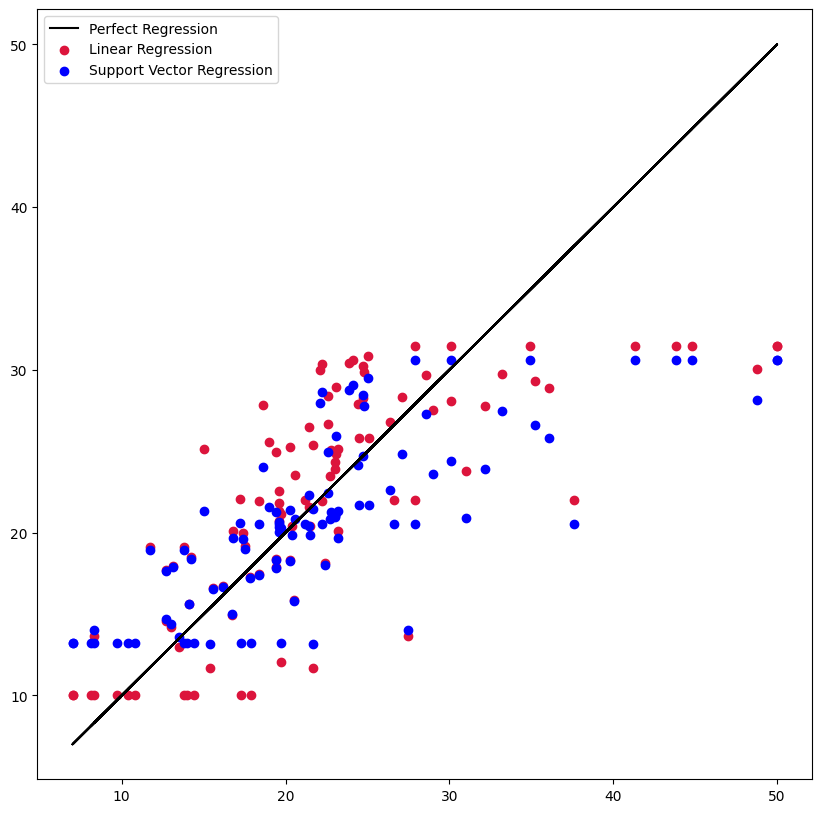

In [82]:
plt.figure(figsize=(10,10))
plt.plot(y2_test,y2_test,color='black',label="perfect") ## Perfect Regression Line
plt.scatter(y2_test,LR2_PRED,c='crimson') ## Linear Regression Predictions
plt.scatter(y2_test,SVR2_PRED,c='blue') ## SVR Predictions
plt.legend(["Perfect Regression","Linear Regression","Support Vector Regression"])
plt.show()

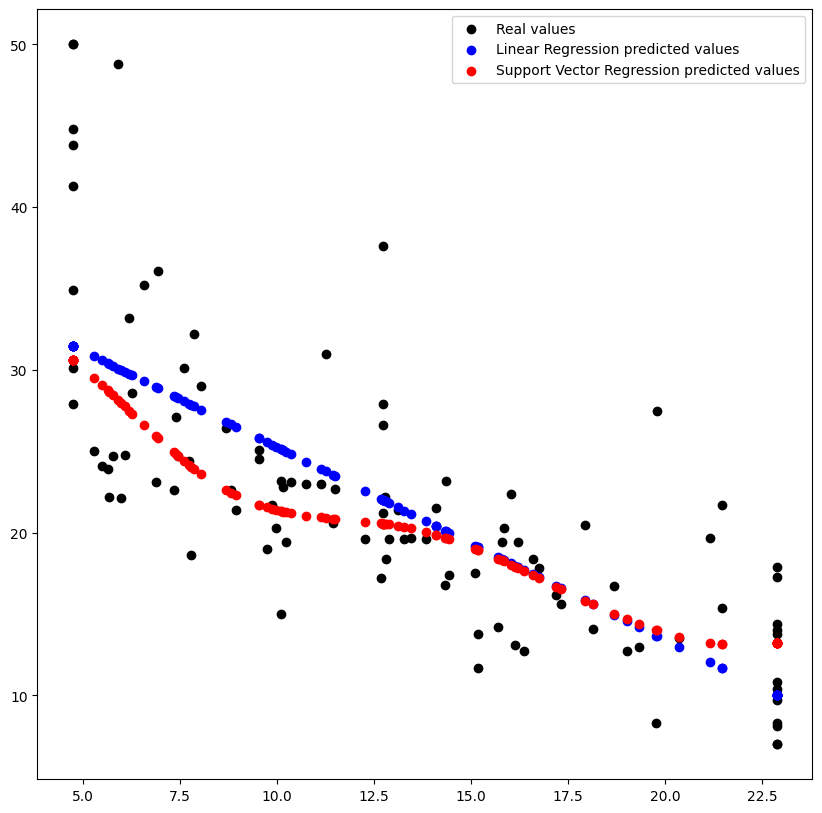

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(x2_test,y2_test,c='black')
plt.scatter(x2_test,LR2_PRED,c='blue')
plt.scatter(x2_test,SVR2_PRED,c='red')
plt.legend(["Real values","Linear Regression predicted values ","Support Vector Regression predicted values"])
plt.show()

In [85]:
MAE_LR2 = mae(y2_test,LR2_PRED)
MAE_SVR2 = mae(y2_test,SVR2_PRED)
print(MAE_LR2)
print(MAE_SVR2)

4.3901831794117525
4.172082993297752


In [90]:
RMSE_LR2 = RMSE(y2_test,LR2_PRED)
print(RMSE_LR2)
RMSE_SVR2 = RMSE(y2_test,SVR2_PRED)
print(RMSE_SVR2)

5.953343032166743
5.970635644796096


## Treating the variable for outliers helped increase the the accuracy of the LR model while had little effect on the SVR model This might be because the method used for treating outliers or the feature chosen but it can be largely said that performance of Support Vector Regression and Linear Regression for said data set was roughly equal with slights up-down's 

## Both the models have there own perks and qalities that are usefull based on different data sets 